# Task 3

In [1]:
from vector_fields import read_vectorfield_data, estimate_vectors, solve_trajectory, create_phase_portrait_matrix, create_phase_portrait_derivative
from function_approximation import approx_lin_func, plot_func_over_data, compute_bases, get_points_and_targets
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np
import math

In [21]:
# Functions for solve_ivp

def rbf_approx(t, y):
    list_of_bases = np.empty(shape=(n_bases))
    for i, center_point in enumerate(centers):
        subtraction = np.subtract(center_point, y)  # note: center_point is a single point, points are many points -> broadcasting
        norm = np.linalg.norm(subtraction)
        basis = np.exp(-norm ** 2 / eps ** 2)
        list_of_bases[i] = basis
    return C @ list_of_bases

def linear_approx(t, y):
    return A @ y

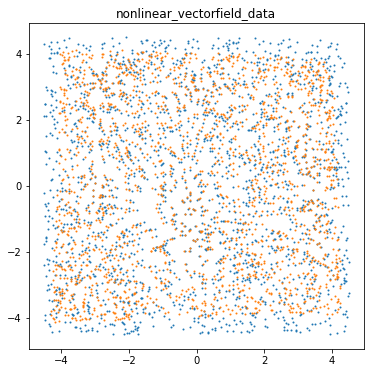

In [3]:
# read the vector field data
x0, x1 = read_vectorfield_data(base_filename="nonlinear_vectorfield_data")
fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.scatter(x0[:,0], x0[:,1], s=1)
ax.scatter(x1[:,0], x1[:,1], s=1)
ax.set_title("nonlinear_vectorfield_data")
plt.show()

### Part 1
Try to approximate the vector field using linear approximation

In [8]:
# utilize delta_t, find delta_t giving lowest possible mse
dt = 0.1
end_time=0.5
plt.rcParams["figure.figsize"] = (14,14)
v = estimate_vectors(dt, x0, x1)
A, res, _, _ = approx_lin_func(data=(x0,v))
print("Residual error:",res)
x1_pred, best_dt, best_mse = solve_trajectory(x0, x1, linear_approx, find_best_dt=True, end_time=end_time, plot=False)
print(f"MSE value at {end_time} is: {np.linalg.norm(x1_pred-x1)**2 / x1.shape[0]}\n Best MSE value is found at time {best_dt} with MSE: {best_mse}")

Residual error: [3890.04548426 3563.97075073]
MSE value at 0.5 is: 0.2015206821878147
 Best MSE value is found at time 0.10101010101010102 with MSE: 0.03728816688355255


Residual error: [3890.04548426 3563.97075073]


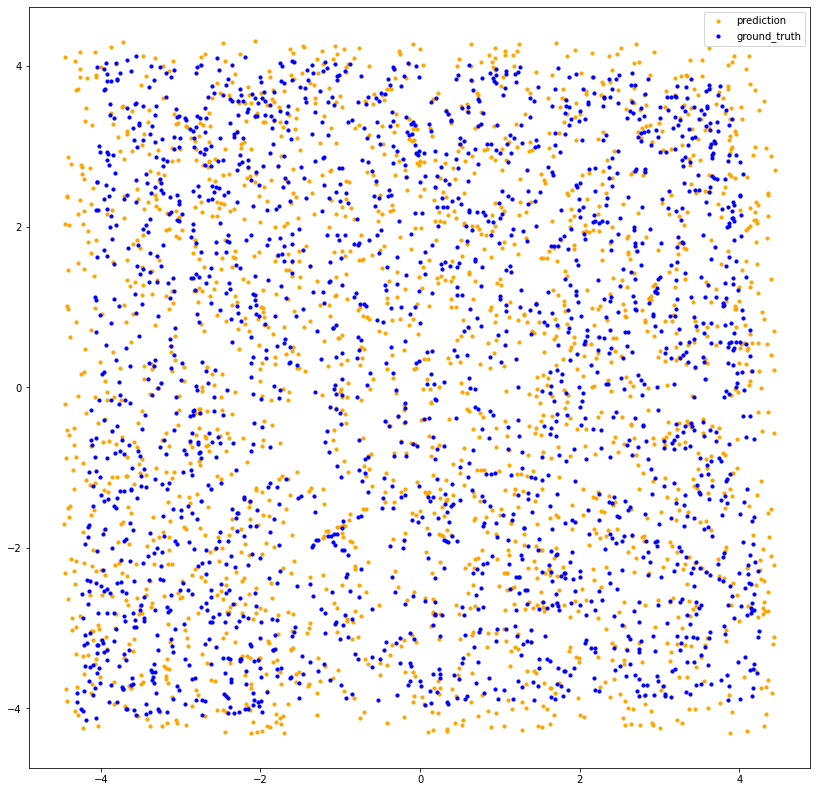

MSE value at 0.10101010101010102 is: 0.03728816688433024


In [14]:
# utilize best delta_t, plot results
dt = 0.1
end_time=best_dt
plt.rcParams["figure.figsize"] = (14,14)
v = estimate_vectors(dt, x0, x1)
A, res, _, _ = approx_lin_func(data=(x0,v))
print("Residual error:",res)
x1_pred, _, _ = solve_trajectory(x0, x1, linear_approx, find_best_dt=False, end_time=end_time, plot=False)
plt.scatter([el[0] for el in x1_pred], [el[1] for el in x1_pred], c='orange', s=10, label='prediction')
plt.scatter(x1[:,0], x1[:,1], c='blue', s=10, label='ground_truth')
plt.legend()
plt.show()
print(f"MSE value at {end_time} is: {np.linalg.norm(x1_pred-x1)**2 / x1.shape[0]}")

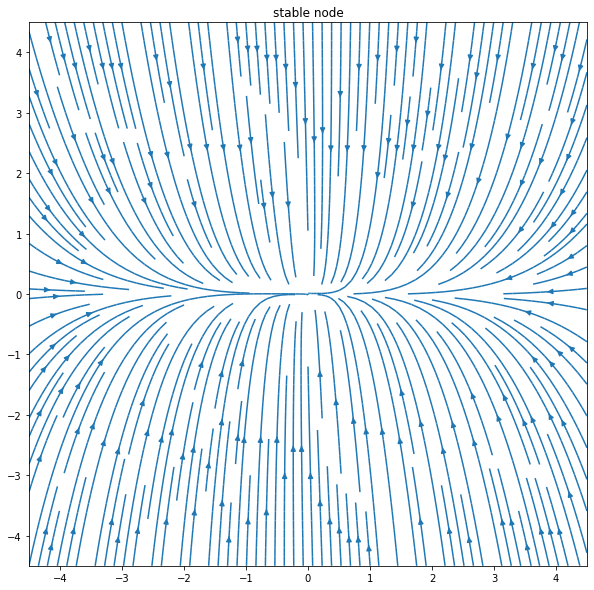

In [15]:
create_phase_portrait_derivative(linear_approx, title_suffix="stable node", display=False)

### Part 2
Try to approximate the vector field using radial basis functions (with the number of centers between
100 and 1000)

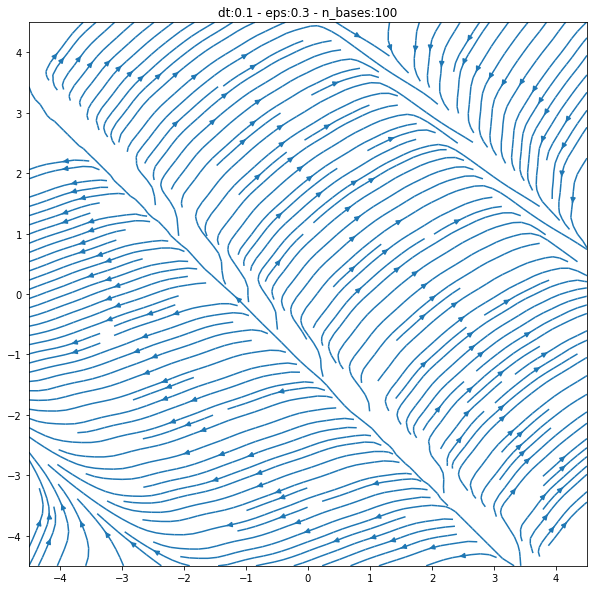

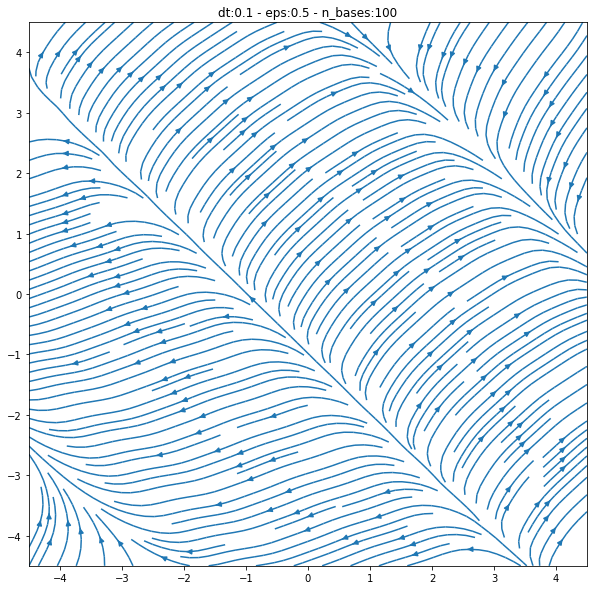

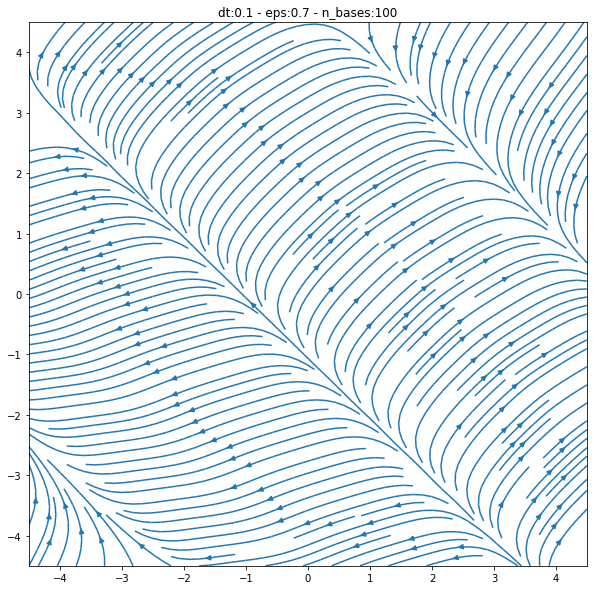

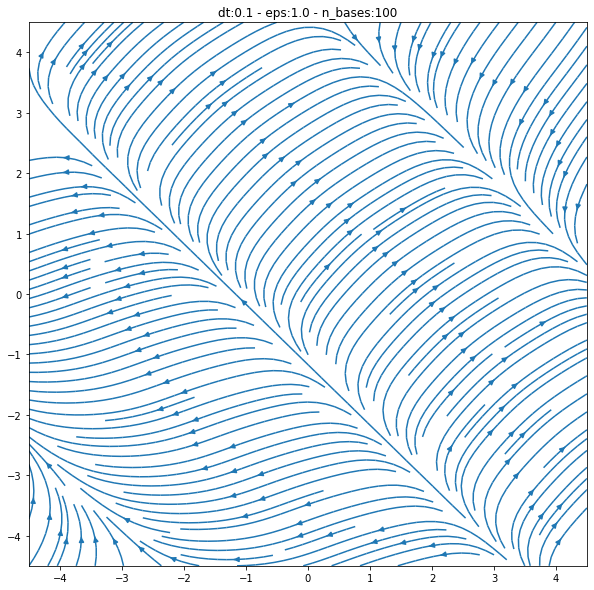

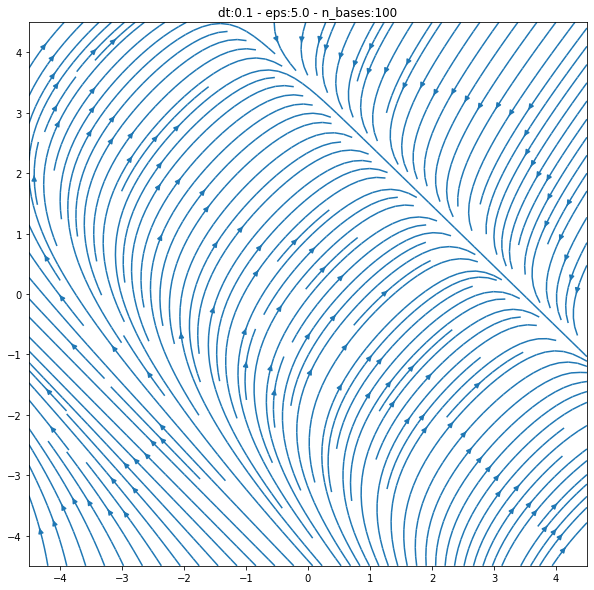

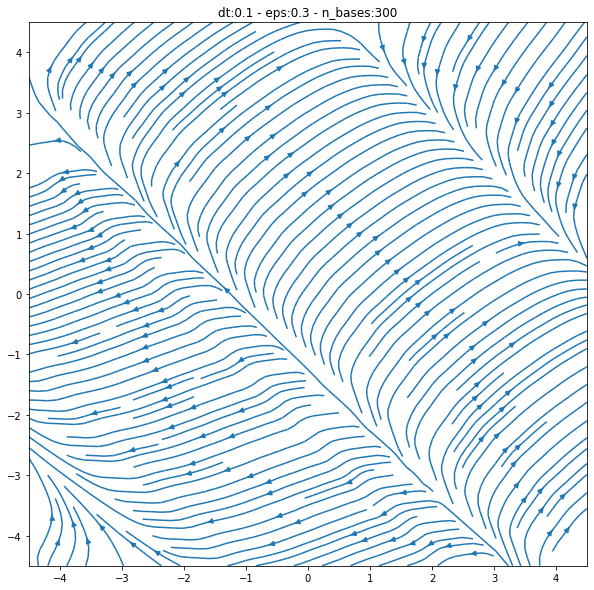

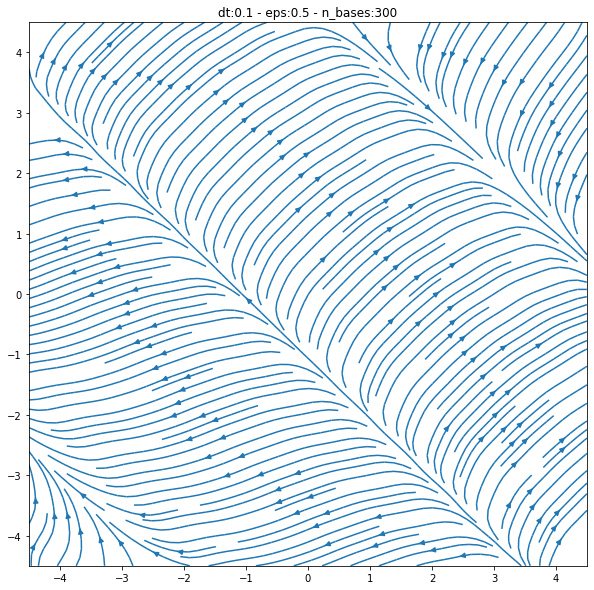

KeyboardInterrupt: 

In [9]:
# trying different configurations!
dt = 0.1
for n_bases in (100, 300, 500, 1000):
    centers = np.random.choice(x0.ravel(), replace=False, size=n_bases)
    for eps in (0.3, 0.5, 0.7, 1.0, 5.0):
            v = estimate_vectors(dt, x0, x1)
            C, res, _, _, _, eps, phi = approx_nonlin_func(data=(x0,v), n_bases=n_bases, eps=eps, centers=centers)
            create_phase_portrait_derivative(rbf_approx, title_suffix=f"dt:{dt} - eps:{eps} - n_bases:{n_bases}", display=True)

In [10]:
# get the best dt and best mse possible
dt = 0.1
end_time=0.5
eps=0.7
n_bases=500
plt.rcParams["figure.figsize"] = (14,14)
v = estimate_vectors(dt, x0, x1)
centers = np.random.choice(x0.ravel(), replace=False, size=n_bases)
C, res, _, _, _, eps, phi = approx_nonlin_func(data=(x0,v), n_bases=n_bases, eps=eps, centers=centers)
print("Residual error:",res)
x1_pred, best_dt, best_mse = solve_trajectory(x0, x1, rbf_approx, find_best_dt=True, end_time=end_time, plot=False)
print(f"MSE value at {end_time} is: {np.linalg.norm(x1_pred-x1)**2 / x1.shape[0]}\n Best MSE value is found at time {best_dt} with MSE: {best_mse}")

Residual error: []
MSE value at 0.5 is: 0.09912469064472165
 Best MSE value is found at time 0.11111111111111112 with MSE: 0.04157391272766677


Residual error: []


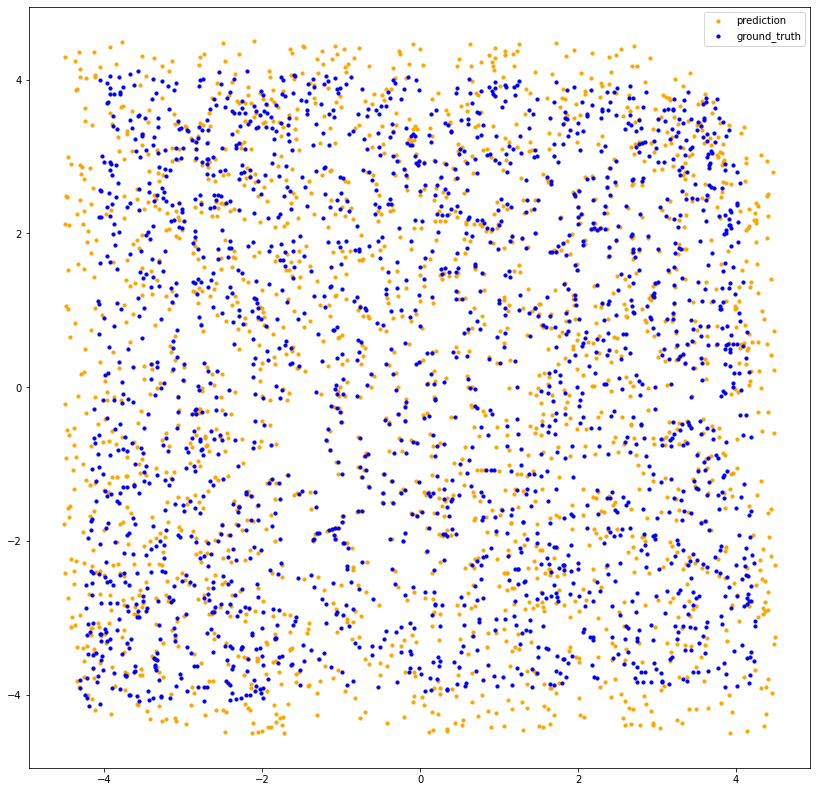

MSE value at 0.11111111111111112 is: 0.04156562153704989


In [22]:
# utilize best delta_t, plot results
dt = 0.1
end_time=best_dt
plt.rcParams["figure.figsize"] = (14,14)
v = estimate_vectors(dt, x0, x1)
C, res, _, _, _, eps, phi = approx_nonlin_func(data=(x0,v), n_bases=n_bases, eps=eps, centers=centers)
print("Residual error:",res)
x1_pred, _, _ = solve_trajectory(x0, x1, rbf_approx, find_best_dt=False, end_time=end_time, plot=False)
plt.scatter([el[0] for el in x1_pred], [el[1] for el in x1_pred], c='orange', s=10, label='prediction')
plt.scatter(x1[:,0], x1[:,1], c='blue', s=10, label='ground_truth')
plt.legend()
plt.show()
print(f"MSE value at {end_time} is: {np.linalg.norm(x1_pred-x1)**2 / x1.shape[0]}")

In [14]:
phi.shape, C.shape

((2000, 500), (2, 500))

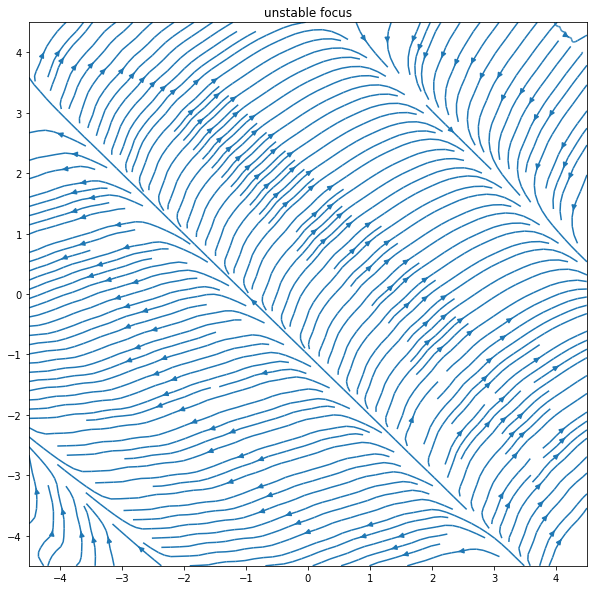

In [23]:
# show phase portrait for best configuration
create_phase_portrait_derivative(rbf_approx, title_suffix="unstable focus", display=False)

### Part 3
use the approximated vector field to solve the system for a larger time,
with all initial points x0

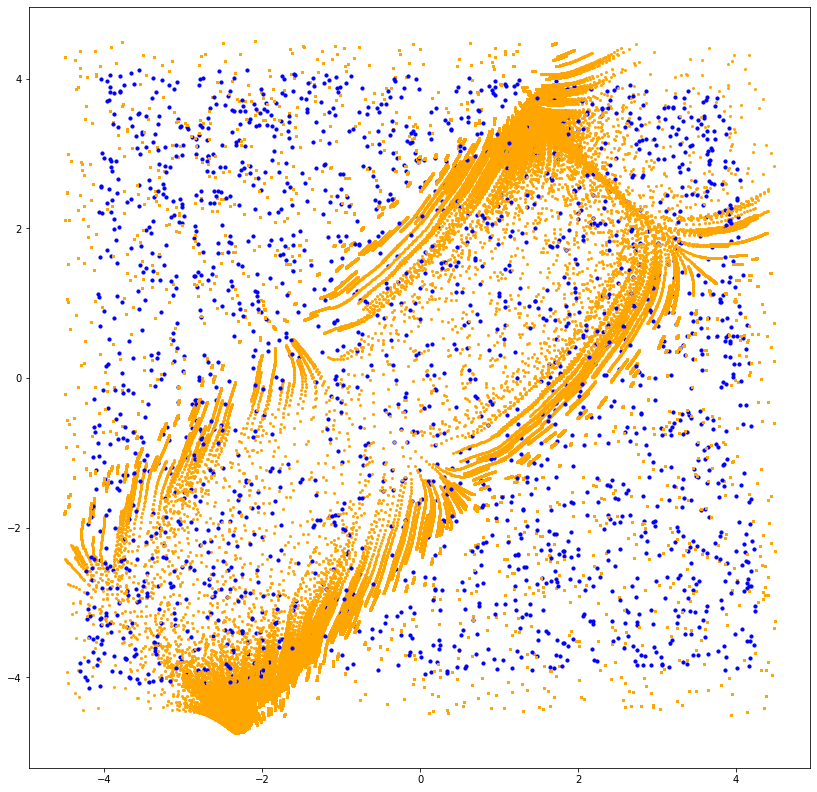

In [34]:
end_time = 50
_, _, _ = solve_trajectory(x0, x1, rbf_approx, find_best_dt=False, end_time=end_time, plot=True)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


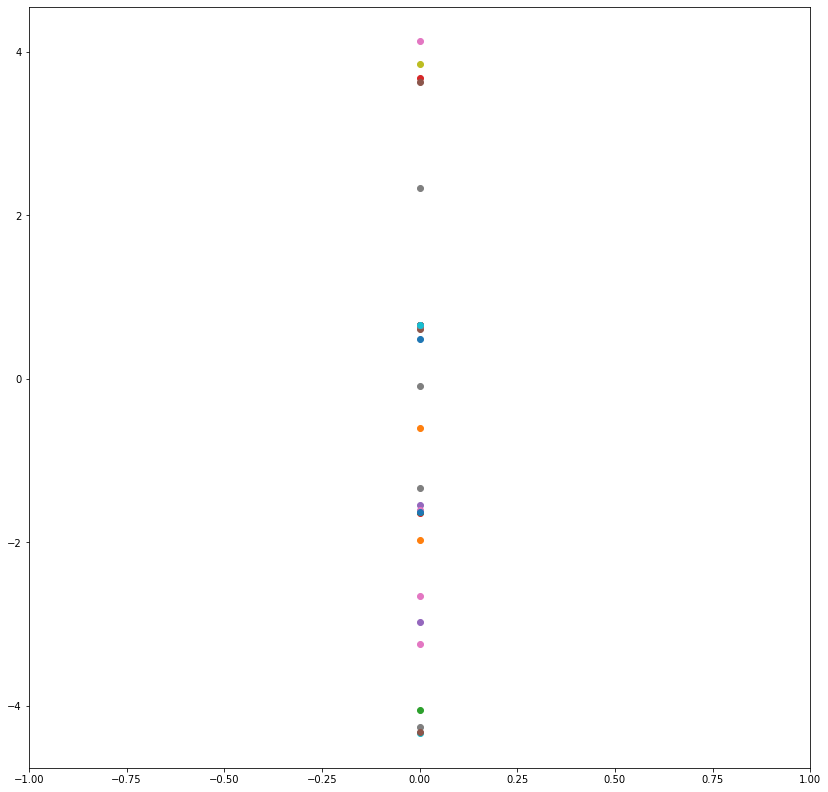

In [35]:
end_time = 100000
for i in range(len(x0)//50):
    print(i)
    sol = solve_ivp(rbf_approx, [0, end_time], x0[i])
    plt.scatter(0, sol.y[0,-1])
plt.xlim(-1, 1)
plt.show()